### Machine Learning Classification  

we are classifying the data based on "Medicare Provider Indicator"(mcareind), we are considering as target variable,

Based on this we care creating 2 classification models Logistic Regression and Random Forest

We will compare both the result based on accuracy score (we are considering 80-20 train-test split)

In [14]:
#importing necessary libraries
# Data Cleaning/ Wrangling
import pandas as pd

# train_test_split function
from sklearn.model_selection import train_test_split

# Classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Accuracy metrices
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
def load_dataset(filename):
    '''
    '''
    dataframe = pd.read_csv(filename)
    return dataframe

df = load_dataset('NYSDOH_PNDS_IndividualProviderData_2012Q_20000_rows.csv')

In [6]:
df.shape

(885383, 90)

#### Data Cleaning

In [7]:
#removing NA values and replacing NAN with 0 from the dataset
df.dropna(axis=0, how='all', inplace=True)
df_num = df.select_dtypes(include = ['float64'])
df_num = df_num.fillna(0)
df_num.shape

(31499, 68)

In [8]:
df_num.mcareind.value_counts()

0.0    18533
1.0    12966
Name: mcareind, dtype: int64

we have 18533 records for class 0 and 12966 records for class 1, lets visualize it,

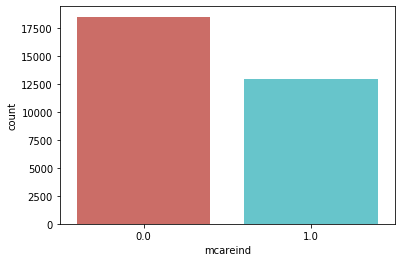

In [9]:
sns.countplot(x='mcareind', data=df_num, palette='hls')
plt.show()

#### Creating training and testing Data set

In [10]:
#splitting the dataset into Train and Test with 80% records in train and 20% records in test
X_train, X_test, y_train, y_test = train_test_split(df_num.drop('mcareind', axis=1), df_num.mcareind, test_size=0.2)

### RandomForest Classifier

In [11]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9952380952380953


#### Feature Importance plot, to visualize important feature

No handles with labels found to put in legend.


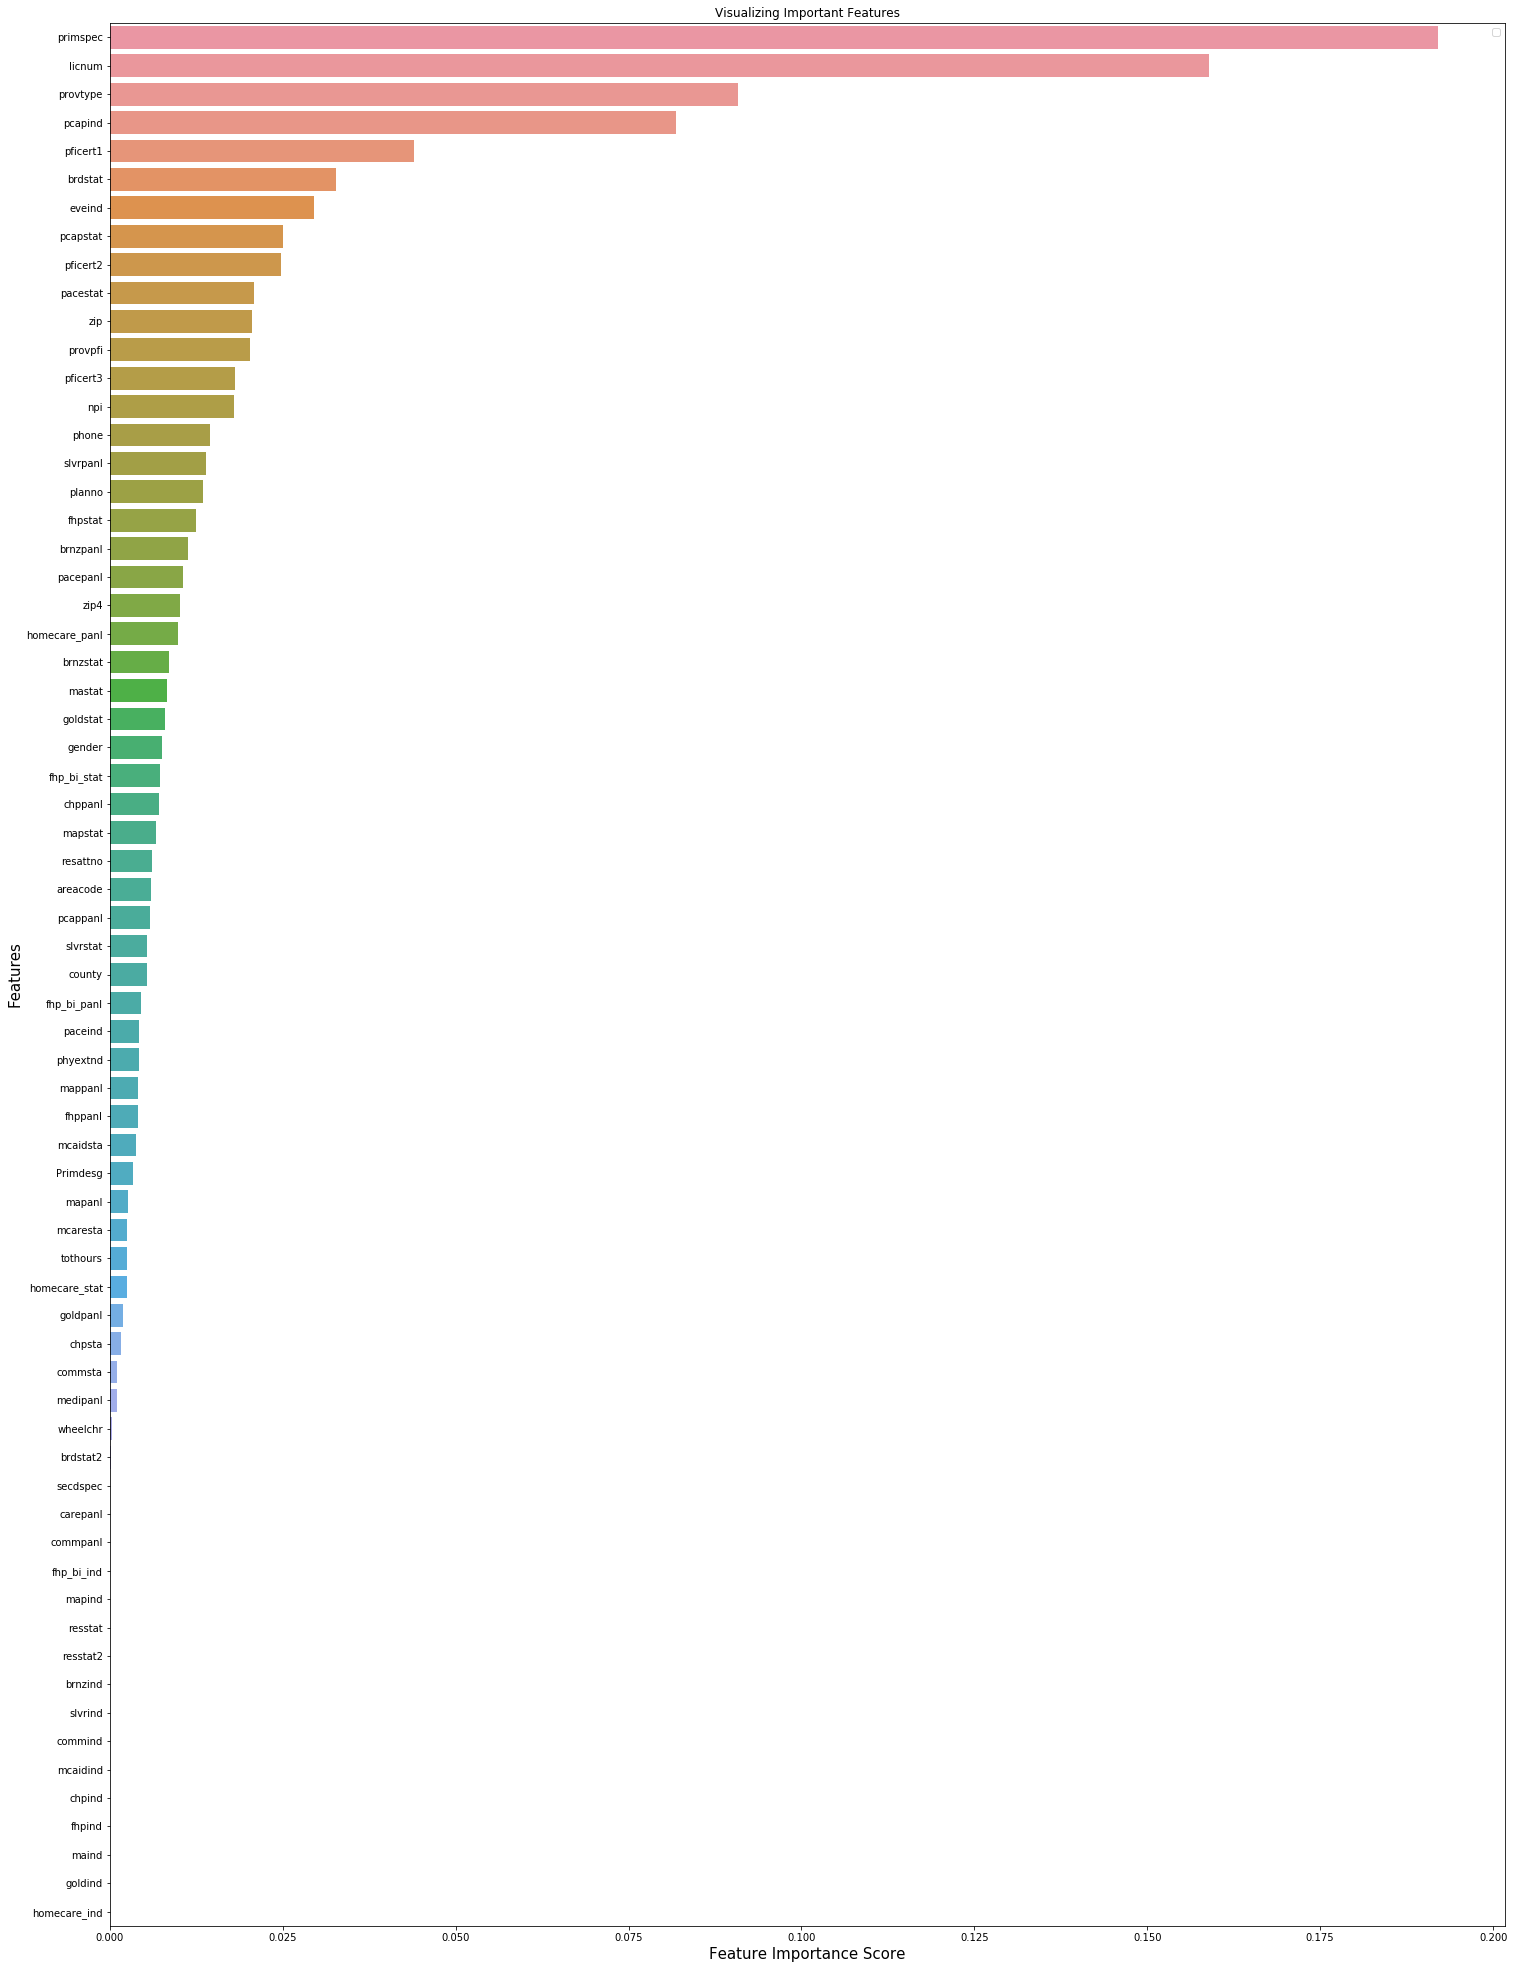

In [16]:
feature_imp = pd.Series(clf.feature_importances_,index=df_num.drop('mcareind', axis=1).columns).sort_values(ascending=False)
feature_imp

# Creating a bar plot
plt.figure(figsize=(25,35))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Logistic Regression Model

In [18]:
# creating the model and fitting the data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# predicting the accuracy score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [20]:
# Confusion Matrix to visualize TP,TN,FP,FN
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3484  238]
 [ 785 1793]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.87      3722
         1.0       0.88      0.70      0.78      2578

    accuracy                           0.84      6300
   macro avg       0.85      0.82      0.83      6300
weighted avg       0.84      0.84      0.83      6300



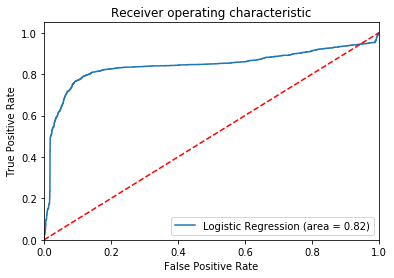

In [22]:
# plotting AUC_ROC curve to visualize the accuracy
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### As we can seen from the model accuracy Random Forest is giving more than 99% accuracy and logistic Regression has 84% accuracy, we can conculde that Random Forest better prediction capability with PNDS dataset